# **Car Accident Data**
The dataset provides detailed records of road accidents that occurred during January 2021. It includes information such as the accident date, day of the week, junction control, accident severity, geographical coordinates, lighting and weather conditions, vehicle details, and more. The data is valuable for analyzing and understanding the factors contributing to road accidents in this urban area, aiding in the development of strategies for improved road safety.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os

filepath = '/content/gdrive/MyDrive/Road Accident Data.csv'
data = pd.read_csv(filepath)
print(data.shape)
data.head()

(307973, 21)


,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [ ]:
# Number of rows
print("number of rows:" , data.shape[0])

# Column names
print("Column names:" , data.columns.tolist())

# Data types
print("Data types:\n", data.dtypes)

number of rows: 307973
Column names: ['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
Data types:
 Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions

In [ ]:
data.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [ ]:
#The number of each Accident_Severity- the target
print(data["Accident_Severity"].value_counts())

Accident_Severity
Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64


# Explanation:

**Accident_Index:** A unique identifier for each accident record.

**Accident Date:** The date on which the accident occurred (format: DD/MM/YYYY).

**Day_of_Week:** The day of the week when the accident took place.

**Junction_Control:** Describes the type of junction control at the accident location (e.g., "Give way or uncontrolled").

**Junction_Detail:** Provides additional details about the junction where the accident occurred (e.g., "T or staggered junction").

**Accident_Severity:** Indicates the severity of the accident (e.g., "Serious").

**Latitude:** The geographic latitude of the accident location.

**Light_Conditions:** Describes the lighting conditions at the time of the accident (e.g., "Daylight").

**Local_Authority_(District):** The local authority district where the accident occurred.

**Carriageway_Hazards:** Describes any hazards present on the carriageway at the time of the accident (e.g., "None").

**Longitude:** The geographic longitude of the accident location.

**Number_of_Casualties:** The total number of casualties involved in the accident.

**Number_of_Vehicles:** The total number of vehicles involved in the accident.

**Police_Force:** The police force that handled the accident.

**Road_Surface_Conditions:** Describes the surface conditions of the road at the time of the accident (e.g., "Dry").

**Road_Type:** Specifies the type of road where the accident occurred (e.g., "One way street").

**Speed_limit:** The speed limit applicable to the road where the accident occurred.

**Time:** The time of day when the accident happened (format: HH:MM).

**Urban_or_Rural_Area:** Indicates whether the accident occurred in an urban or rural area.

**Weather_Conditions:** Describes the weather conditions at the time of the accident (e.g., "Fine no high winds").

**Vehicle_Type:** Specifies the type of vehicle involved in the accident (e.g., "Car," "Taxi/Private hire car").

## Cleaning the dataset

*Remove unnecessary columns


In [ ]:
data.drop(['Accident_Index', 'Police_Force', 'Accident Date', 'Local_Authority_(District)', 'Carriageway_Hazards'], axis=1, inplace=True)
print(data.shape)
data.head()

(307973, 16)


,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,-0.201349,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,-0.199248,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,-0.179599,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,-0.203110,1,2,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,-0.173445,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


*Remove rows with any missing values

In [ ]:
data = data.dropna()
print(data.shape)
data.head()

(300495, 16)


,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,-0.201349,1,2,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,-0.199248,11,2,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,-0.179599,1,2,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,-0.203110,1,2,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,-0.173445,1,2,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


*Selecting rows to reduce the database by shuffle in order to maintain the class ratio

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np

# Calculate the number of samples to delete from each severity class
# Convert the columns to their original data types
original_dtypes = data.dtypes

class_counts = data['Accident_Severity'].value_counts()
delete_counts = (class_counts * 0.5).astype(int)

# Shuffle the dataset
df_shuffled = data.sample(frac=1, random_state=42)

# Initialize an empty DataFrame to store the balanced dataset
df_balanced = pd.DataFrame(columns=data.columns)

# Iterate through each severity class and delete samples to achieve 50% reduction
for severity, count in delete_counts.items():
    df_cls = df_shuffled[df_shuffled['Accident_Severity'] == severity]
    df_balanced = pd.concat([df_balanced, df_cls.iloc[count:]])

# df_balanced now contains the balanced dataset with 50% of samples deleted while maintaining class ratio
data=df_balanced
data = data.astype(original_dtypes)

print(data.shape)
data.head()

(150248, 16)


,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
166733,Monday,Give way or uncontrolled,T or staggered junction,Slight,51.559410,Darkness - lights lit,-0.122017,2,2,Frost or ice,Single carriageway,30,21:30,Urban,Other,Car
1684,Friday,Give way or uncontrolled,T or staggered junction,Slight,51.524786,Darkness - lights lit,-0.116234,1,1,Wet or damp,Single carriageway,30,23:35,Urban,Fine no high winds,Car
221874,Wednesday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.614423,Daylight,-0.425560,1,3,Frost or ice,Dual carriageway,70,8:12,Rural,Fine no high winds,Car
23547,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,54.204379,Daylight,-2.991417,1,1,Dry,Single carriageway,50,17:14,Rural,Fine no high winds,Bus or coach (17 or more pass seats)
298733,Wednesday,Give way or uncontrolled,Crossroads,Slight,51.100994,Daylight,-1.839437,3,2,Wet or damp,Single carriageway,50,8:35,Rural,Raining no high winds,Car


In [ ]:
#The number of each Accident_Severity- the target
print(data["Accident_Severity"].value_counts())


Accident_Severity
Slight     128260
Serious     20042
Fatal        1922
Fetal          24
Name: count, dtype: int64


##Diagrams

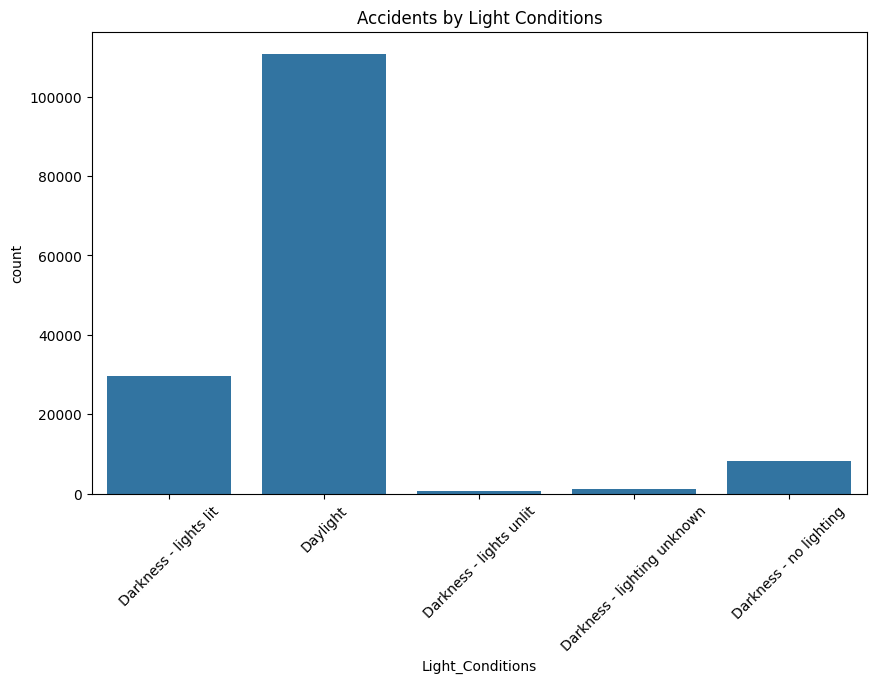

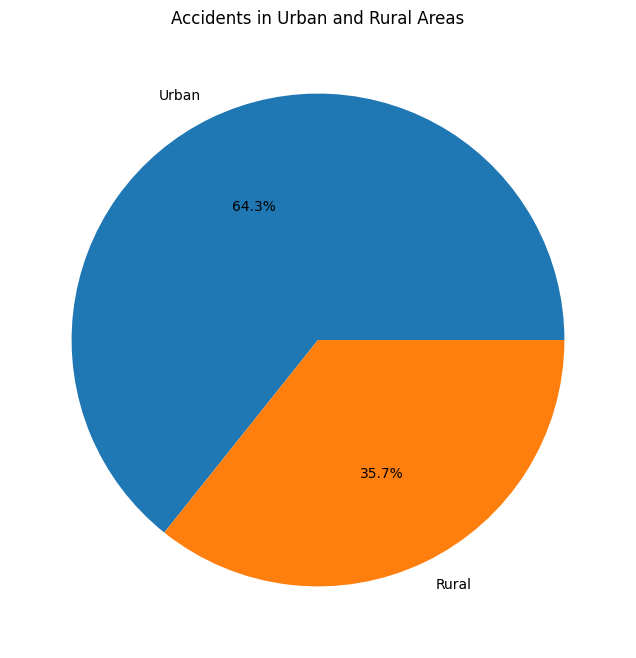

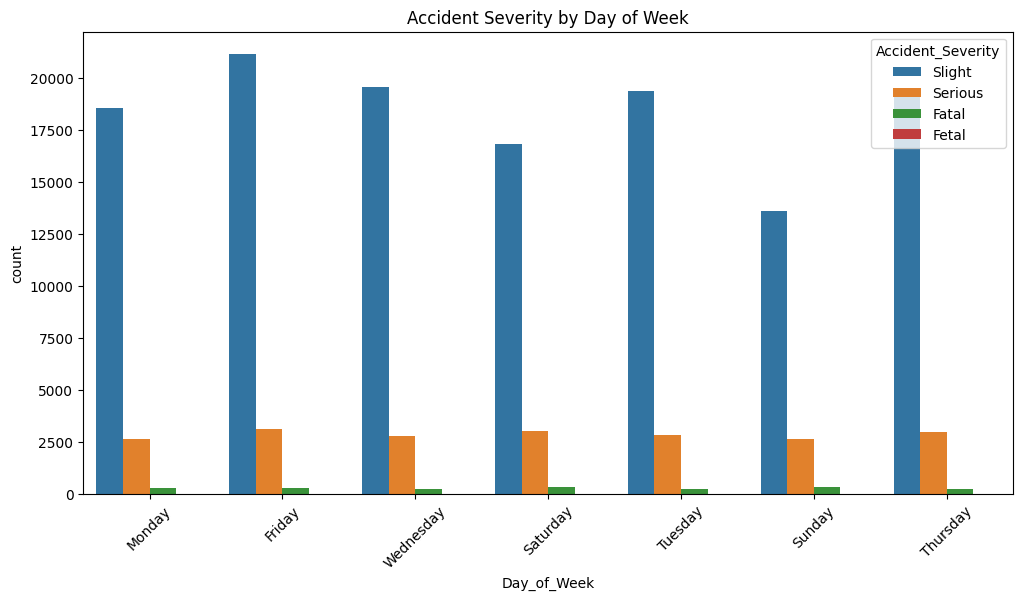

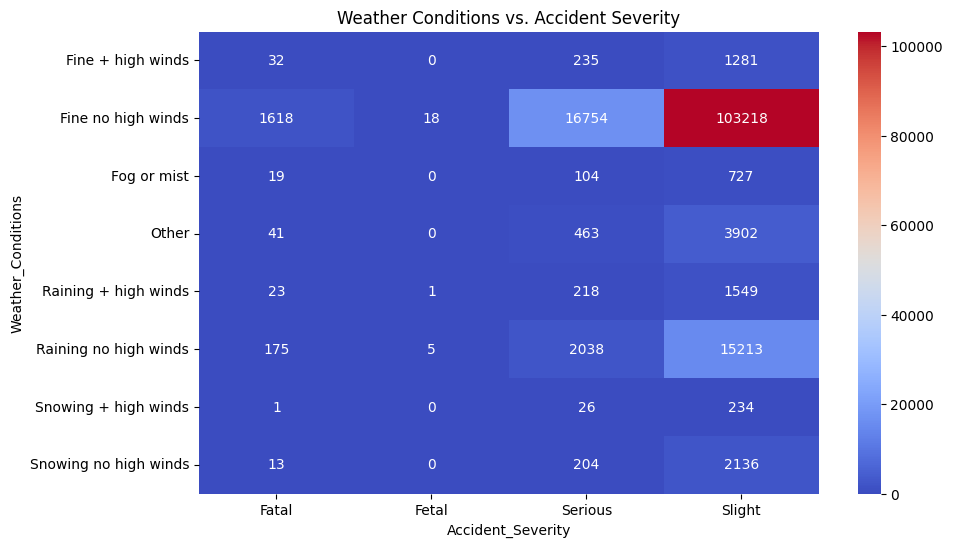

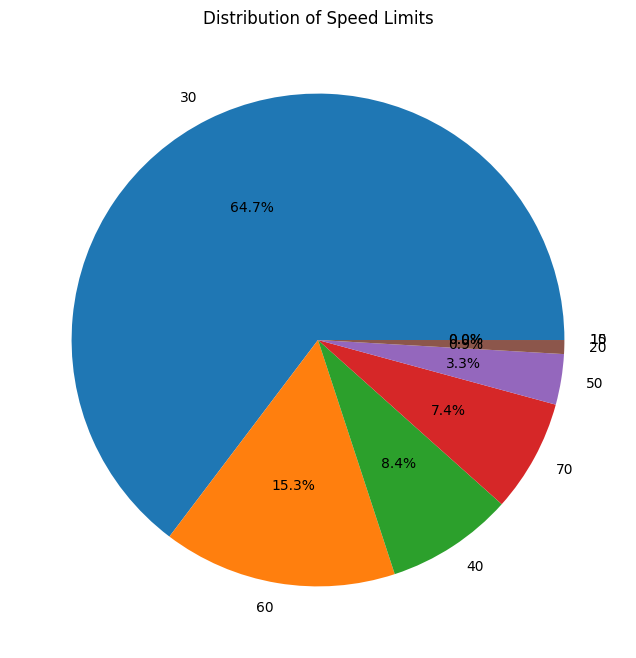

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for Light Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_Conditions', data=data)
plt.title('Accidents by Light Conditions')
plt.xticks(rotation=45)
plt.show()

# Pie chart for Urban_or_Rural_Area
plt.figure(figsize=(8, 8))
data['Urban_or_Rural_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Accidents in Urban and Rural Areas')
plt.ylabel('')
plt.show()

# Stacked bar chart for Accident_Severity by Day_of_Week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Accident_Severity', data=data)
plt.title('Accident Severity by Day of Week')
plt.xticks(rotation=45)
plt.show()

# Heatmap for Weather_Conditions and Accident_Severity
plt.figure(figsize=(10, 6))
weather_accident_pivot = data.pivot_table(index='Weather_Conditions', columns='Accident_Severity', aggfunc='size', fill_value=0)
sns.heatmap(weather_accident_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Weather Conditions vs. Accident Severity')
plt.show()

# Pie chart for Speed Limit
plt.figure(figsize=(8, 8))
data['Speed_limit'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Speed Limits')
plt.ylabel('')
plt.show()

##Encoding the data

*Changing the data type in 'Time' column from continuous to discrete

In [ ]:
for index, row in data.iterrows():
    data.at[index, 'Time'] = int(row['Time'].split(':')[0])
    if data.at[index, 'Time'] == 0:
      data.at[index, 'Time'] = 24
data['Time'] = data['Time'].astype(int)
print(data['Time'])

166733    21
1684      23
221874     8
23547     17
298733     8
          ..
733        8
606       21
607       19
762        8
610       13
Name: Time, Length: 150248, dtype: int64


*change the name of 'Urban_or_Rural_Area' column to 'Is_Urban'

In [ ]:
data.rename(columns={'Urban_or_Rural_Area': 'Is_Urban'}, inplace=True)

*Encoding 'Urban_or_Rural_Area' column

In [ ]:
#urban=1, rural=0
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
data['Is_Urban'] = lb.fit_transform(data['Is_Urban'])
print(data['Is_Urban'])

166733    1
1684      1
221874    0
23547     0
298733    0
         ..
733       1
606       1
607       1
762       1
610       1
Name: Is_Urban, Length: 150248, dtype: int64


*Encoding the target column 'Accident_Severity'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset
category = ['Slight', 'Fetal', 'Serious', 'Fatal']

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=[category])

data_reshaped=data['Accident_Severity'].values.reshape(-1,1)

# Fit and transform the data
data['Accident_Severity'] = encoder.fit_transform(data_reshaped)

data['Accident_Severity'] = data['Accident_Severity'].astype(int)
# Display the encoded data
data.head()


,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Is_Urban,Weather_Conditions,Vehicle_Type
166733,Monday,Give way or uncontrolled,T or staggered junction,0,51.559410,Darkness - lights lit,-0.122017,2,2,Frost or ice,Single carriageway,30,21,1,Other,Car
1684,Friday,Give way or uncontrolled,T or staggered junction,0,51.524786,Darkness - lights lit,-0.116234,1,1,Wet or damp,Single carriageway,30,23,1,Fine no high winds,Car
221874,Wednesday,Data missing or out of range,Not at junction or within 20 metres,0,53.614423,Daylight,-0.425560,1,3,Frost or ice,Dual carriageway,70,8,0,Fine no high winds,Car
23547,Monday,Data missing or out of range,Not at junction or within 20 metres,0,54.204379,Daylight,-2.991417,1,1,Dry,Single carriageway,50,17,0,Fine no high winds,Bus or coach (17 or more pass seats)
298733,Wednesday,Give way or uncontrolled,Crossroads,0,51.100994,Daylight,-1.839437,3,2,Wet or damp,Single carriageway,50,8,0,Raining no high winds,Car


In [ ]:
# Select the object (string) columns
import numpy as np

mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [ ]:
for col in categorical_cols:
    unique_values = data[col].unique()
    num_unique_values = data[col].nunique()
    print(f"'{col}': {unique_values} = {num_unique_values}")

'Day_of_Week': ['Monday' 'Friday' 'Wednesday' 'Saturday' 'Tuesday' 'Sunday' 'Thursday'] = 7
'Junction_Control': ['Give way or uncontrolled' 'Data missing or out of range'
 'Not at junction or within 20 metres' 'Auto traffic signal' 'Stop sign'
 'Auto traffic sigl' 'Authorised person'] = 7
'Junction_Detail': ['T or staggered junction' 'Not at junction or within 20 metres'
 'Crossroads' 'Slip road' 'Roundabout' 'Private drive or entrance'
 'More than 4 arms (not roundabout)' 'Other junction' 'Mini-roundabout'] = 9
'Light_Conditions': ['Darkness - lights lit' 'Daylight' 'Darkness - lights unlit'
 'Darkness - lighting unknown' 'Darkness - no lighting'] = 5
'Road_Surface_Conditions': ['Frost or ice' 'Wet or damp' 'Dry' 'Snow' 'Flood over 3cm. deep'] = 5
'Road_Type': ['Single carriageway' 'Dual carriageway' 'Roundabout' 'Slip road'
 'One way street'] = 5
'Weather_Conditions': ['Other' 'Fine no high winds' 'Raining no high winds'
 'Snowing no high winds' 'Raining + high winds' 'Fine + high wi

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 53 columns, assuming the original ones are dropped.
# This is quite a few extra columns!
small_num_ohc_cols.sum()

53

why choose 'OneHotEncoder' and not 'get_dummies'? 'OneHotEncoder' is more flexible and can handle a wider range of scenarios, such as working with missing values and unknown categories

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:

    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)

    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(),
                          index=data_ohc.index,
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)


In [ ]:
data_ohc

,Accident_Severity,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Time,Is_Urban,Vehicle_Type_0,Vehicle_Type_1,...,Road_Surface_Conditions_0,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Type_0,Road_Type_1,Road_Type_2,Road_Type_3,Road_Type_4
166733,0,51.559410,-0.122017,2,2,30,21,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0,51.524786,-0.116234,1,1,30,23,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
221874,0,53.614423,-0.425560,1,3,70,8,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23547,0,54.204379,-2.991417,1,1,50,17,0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
298733,0,51.100994,-1.839437,3,2,50,8,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,1,51.517370,-0.108036,1,2,30,8,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
606,1,51.484044,-0.184312,1,2,30,21,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
607,1,51.486491,-0.179750,1,1,30,19,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
762,1,51.520255,-0.097394,1,2,30,8,1,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

53

##checking correlation between dependent variables

In [ ]:
# Calculate the correlation values
feature_cols = data_ohc.columns[:-1]
corr_values = data_ohc[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

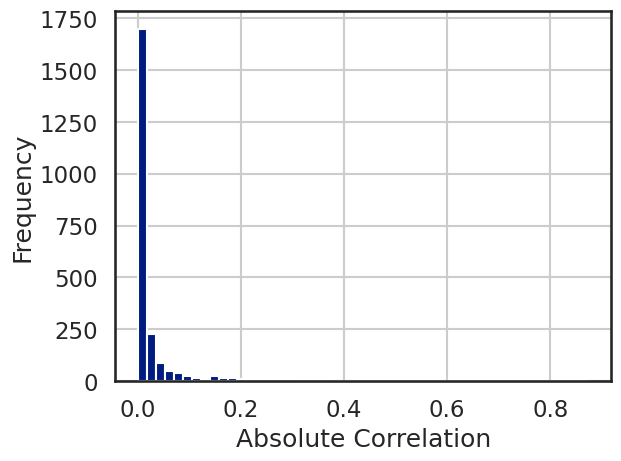

In [ ]:
#A histogram of the absolute value correlations.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

##Checking Skew of the data

In [ ]:
data= data_ohc
y_col = 'Accident_Severity'
feature_cols = [x for x in data.columns if x != y_col]
x_data = data[feature_cols]
y_data = data[y_col]

In [ ]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]
skew_limit = 0.75
skew_vals = x_data[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
Vehicle_Type_12,387.618369
Vehicle_Type_11,73.233239
Junction_Control_1,53.725623
Road_Surface_Conditions_1,28.523371
Junction_Control_0,26.016729
Weather_Conditions_6,23.930650
Vehicle_Type_0,20.131894
Vehicle_Type_5,18.568954
Light_Conditions_2,15.547106
Junction_Control_6,13.310244


In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    x_data[col] = np.log1p(x_data[col])

##Scaling the data

Using 'MinMaxScaler' when you need to bound the data to a specific range, especially if your data does not follow a normal distribution or if you are using algorithms that require the data to be on a similar scale, such as KNN.

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()
x_data = pd.DataFrame(msc.fit_transform(x_data),  # this is an np.array, not a dataframe.
                    columns=x_data.columns)
x_data

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit,Time,Is_Urban,Vehicle_Type_0,Vehicle_Type_1,Vehicle_Type_2,...,Road_Surface_Conditions_0,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Type_0,Road_Type_1,Road_Type_2,Road_Type_3,Road_Type_4
0,0.167524,0.796892,0.021277,0.032258,0.333333,0.869565,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.164045,0.797516,0.000000,0.000000,0.333333,0.956522,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.370025,0.764102,0.000000,0.064516,1.000000,0.304348,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.426752,0.486926,0.000000,0.000000,0.666667,0.695652,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.121273,0.611368,0.042553,0.032258,0.666667,0.304348,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150243,0.163300,0.798402,0.000000,0.032258,0.333333,0.304348,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150244,0.159948,0.790162,0.000000,0.032258,0.333333,0.869565,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150245,0.160194,0.790655,0.000000,0.000000,0.333333,0.782609,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
150246,0.163590,0.799552,0.000000,0.032258,0.333333,0.304348,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,stratify=y_data, test_size=0.3)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((105173, 68), (105173,), (45075, 68), (45075,))

##KNN

In [ ]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

results_dict={}
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    # Calculate accuracy
    acc = accuracy(y_test, y_pred)

    # Store results in the dictionary
    results_dict[k] = acc

for k, result in results_dict.items():
    print(f'k={k}, Accuracy={result}')

k=1, Accuracy=0.7551636161952302
k=2, Accuracy=0.8393788130892956
k=3, Accuracy=0.8205435385468663
k=4, Accuracy=0.8451026067665003
k=5, Accuracy=0.8394231835829173


##LR- Logistic Regression

'saga': This is an extension of the SAG solver that also supports L1 regularization. It is recommended for large datasets and problems with a large number of features. It can handle both L1 and L2 penalties and is suitable for multi-class classification.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='macro'),
                      'recall': recall_score(y_true, y_pred, average='macro'),
                      'f1': f1_score(y_true, y_pred, average='macro')},
                      name=label)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga').fit(x_train, y_train)
y_test_pred_l1 = lr_l1.predict(x_test)
print(measure_error(y_test, y_test_pred_l1, 'l1'))

accuracy     0.853644
precision    0.213411
recall       0.250000
f1           0.230261
Name: l1, dtype: float64


In [ ]:
print(lr_l1.Cs_)
best_C = lr_l1.C_[0]
print("Best C value:", best_C)

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Best C value: 0.0001


In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='lbfgs').fit(x_train, y_train)
y_test_pred_l2 = lr_l2.predict(x_test)
print(measure_error(y_test, y_test_pred_l2, 'l2'))

accuracy     0.853644
precision    0.393608
recall       0.250707
f1           0.231789
Name: l2, dtype: float64


In [ ]:
print(lr_l2.Cs_)
best_C = lr_l2.C_[0]
print("Best C value:", best_C)

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Best C value: 21.54434690031882


In [ ]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression- none regularization
lr_no_reg = LogisticRegression(C=100000).fit(x_train, y_train)
y_test_pred_lr_no_reg = lr_no_reg.predict(x_test)
print(measure_error(y_test, y_test_pred_lr_no_reg, 'lr_no_reg'))

accuracy     0.853622
precision    0.316388
recall       0.250239
f1           0.230840
Name: lr_no_reg, dtype: float64


In [ ]:
coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]
for lab,mod in zip(coeff_labels, coeff_models):
  print(lab, ":", np.max(np.abs(mod.coef_)))

l1 : 0.0
l2 : 9.221233901416067
lr_no_reg : 7.330828394614625


In [ ]:
coefficients = list()

coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3]], codes=[[0,0,0,0], [0,1,2,3]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

l1                       l2                               lr_no_reg  \
      0    1    2    3         0         1         2         3         0   
1   0.0  0.0  0.0  0.0 -0.818379  1.944895 -0.604809 -0.521707 -0.090843   
41  0.0  0.0  0.0  0.0 -0.054920 -0.068306  0.020803  0.102423  0.183941   
55  0.0  0.0  0.0  0.0 -0.052812 -0.144606 -0.010377  0.207795  0.173856   
23  0.0  0.0  0.0  0.0  0.362906 -0.218598  0.064377 -0.208685  0.371085   
14  0.0  0.0  0.0  0.0  0.059337 -0.277104  0.153871  0.063896  0.133417   
35  0.0  0.0  0.0  0.0 -0.248551  0.902169 -0.305139 -0.348479  0.229850   
22  0.0  0.0  0.0  0.0 -0.080550  0.003313 -0.009494  0.086731  0.026176   
53  0.0  0.0  0.0  0.0  0.281504 -0.108543  0.200560 -0.373521  0.608127   
5   0.0  0.0  0.0  0.0  0.217807  0.118655  0.138009 -0.474470  0.406745   
34  0.0  0.0  0.0  0.0  0.278193 -0.528627  0.211507  0.038928  0.314440   

                                  
           1         2         3  
1  -0.297512  0.140860  0.247495  
41 -0.271900  0.072211  0.015749  
55 -0.040351 -0.035057 -0.098448  
23 -0.058061 -0.112250 -0.200774  
14 -0.091450  0.115043 -0.157010  
35  0.095838 -0.020247 -0.305442  
22  0.006290 -0.063071  0.030605  
53 -0.051365  0.333815 -0.890577  
5  -0.473848  0.329612 -0.262509  
34 -0.225699  0.091702 -0.180444

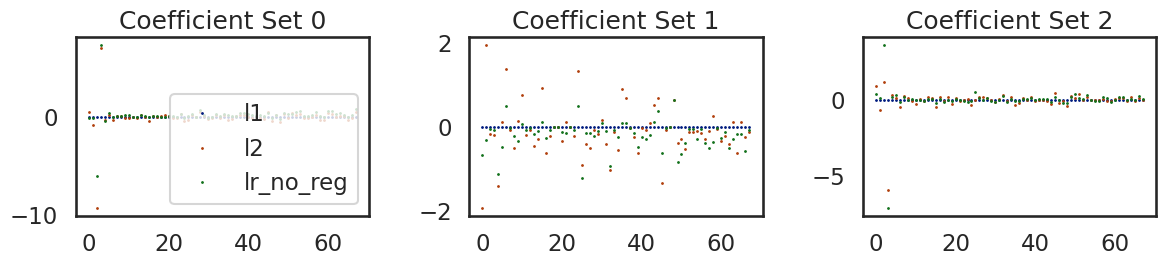

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12,3)


for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]

    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=1.0, ax=ax, legend=False)

    if ax is axList[0]:
        ax.legend(loc=4)

    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [ ]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(x_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(x_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,l1,l2,lr_no_reg
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


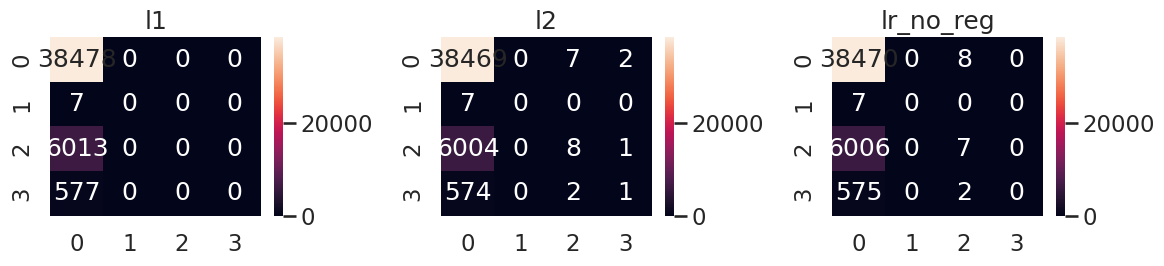

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12, 3)

#axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()

##Summary

High accuracy level -> Low precision, recall and f1 -> Zero
coefficients in l1 model -> L1 model always predicts zero.

Conclusion:
The database is not balanced -> Most of the samples have a
zero classification.